# FlightDelay

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import linregress
from matplotlib import rcParams
from statsmodels.formula.api import ols

In [2]:
flight_data_df = pd.read_csv("data/T_ONTIME_REPORTING.csv")
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flight_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538837 entries, 0 to 538836
Data columns (total 71 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   MONTH                    538837 non-null  int64  
 1   DAY_OF_MONTH             538837 non-null  int64  
 2   DAY_OF_WEEK              538837 non-null  int64  
 3   FL_DATE                  538837 non-null  object 
 4   OP_UNIQUE_CARRIER        538837 non-null  object 
 5   ORIGIN_AIRPORT_ID        538837 non-null  int64  
 6   ORIGIN_AIRPORT_SEQ_ID    538837 non-null  int64  
 7   ORIGIN_CITY_MARKET_ID    538837 non-null  int64  
 8   ORIGIN                   538837 non-null  object 
 9   ORIGIN_CITY_NAME         538837 non-null  object 
 10  ORIGIN_STATE_ABR         538837 non-null  object 
 11  ORIGIN_STATE_FIPS        538837 non-null  int64  
 12  ORIGIN_STATE_NM          538837 non-null  object 
 13  ORIGIN_WAC               538837 non-null  int64  
 14  DEST

In [4]:
flight_data_df.shape

(538837, 71)

In [5]:
flight_data_df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST

In [6]:
flight_data_df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,...,DIV_REACHED_DEST,DIV_ACTUAL_ELAPSED_TIME,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF
count,538837.0,538837.000000,538837.000000,538837.000000,5.388370e+05,538837.000000,538837.000000,538837.000000,538837.000000,5.388370e+05,...,1345.000000,1121.000000,1121.000000,1345.000000,1443.000000,1.443000e+03,1443.000000,1443.000000,1443.000000,1135.000000
mean,1.0,16.095398,3.890269,12653.203128,1.265324e+06,31748.240980,26.713025,54.355763,12653.175350,1.265321e+06,...,0.833457,437.040143,292.958965,38.810409,12707.566182,1.270760e+06,1374.341649,35.939709,27.994456,1453.559471
std,0.0,8.929168,2.076230,1524.197257,1.524195e+05,1310.151761,16.676881,26.919824,1524.146385,1.524145e+05,...,0.372706,250.781370,258.788893,178.614061,1524.158696,1.524159e+05,546.036453,39.015571,31.141104,514.619588
min,1.0,1.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,1.000000,10135.000000,1.013506e+06,...,0.000000,58.000000,4.000000,0.000000,10135.000000,1.013506e+06,1.000000,2.000000,2.000000,3.000000
25%,1.0,8.000000,2.000000,11292.000000,1.129202e+06,30693.000000,12.000000,33.000000,11292.000000,1.129202e+06,...,1.000000,276.000000,143.000000,0.000000,11292.000000,1.129202e+06,1028.500000,15.000000,11.000000,1123.000000
50%,1.0,16.000000,4.000000,12889.000000,1.288904e+06,31454.000000,26.000000,44.000000,12889.000000,1.288904e+06,...,1.000000,361.000000,203.000000,0.000000,12889.000000,1.288904e+06,1334.000000,24.000000,17.000000,1444.000000
75%,1.0,24.000000,6.000000,14027.000000,1.402702e+06,32467.000000,41.000000,82.000000,14027.000000,1.402702e+06,...,1.000000,498.000000,315.000000,0.000000,14057.000000,1.405702e+06,1841.000000,41.000000,31.000000,1827.500000
max,1.0,31.000000,7.000000,16869.000000,1.686902e+06,35991.000000,78.000000,93.000000,16869.000000,1.686902e+06,...,1.000000,1733.000000,1538.000000,2556.000000,15919.000000,1.591905e+06,2400.000000,353.000000,260.000000,2400.000000


In [7]:
data = flight_data_df[['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']]
headers = ['CARRIER_DELAY','WEATHER_DELAY','NAS_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','DIV_ARR_DELAY']
df1 = pd.DataFrame(data, columns=headers)
df1.head()

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_ARR_DELAY
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,83.0,2.0,0.0,342.0,NaN
4,11.0,0.0,0.0,0.0,61.0,NaN


In [8]:
def airline_abbreviation_to_name(x): 
    airline_abb = {
        "WN" : "Southwest Airlines",
        "DL" : "Delta Airlines",
        "AA" : "American Airlines",
        "UA" : "United Airlines",
        "OO" : "SkyWest Airlines Inc.",
        "YX" : "Republic Airline",
        "B6" : "JetBlue Airways",
        "NK" : "Spirit Airlines",
        "AS" : "Alaska Airlines",
        "MQ" : "Envoy Air",
        "9E" : "Endeavor Air Inc.",
        "OH" :    "PSA Airlines Inc.",
        "F9" : "Frontier Airlines",
        "G4" : "Allegiant Air",
        "HA" : "Hawaiian Airlines"
    }
    for key, value in airline_abb.items():
        if x == key:
            x = value
    return x

flight_data_df["Airline"] = flight_data_df["OP_UNIQUE_CARRIER"].apply(airline_abbreviation_to_name)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [9]:
airlines=flight_data_df.Airline.unique()
len(airlines)

15

In [10]:
value=flight_data_df.Airline.value_counts()
value

Airline
Southwest Airlines       112430
Delta Airlines            75174
American Airlines         74999
United Airlines           56657
SkyWest Airlines Inc.     50347
Republic Airline          24476
JetBlue Airways           23249
Spirit Airlines           21876
Alaska Airlines           19801
Envoy Air                 18849
Endeavor Air Inc.         16926
PSA Airlines Inc.         15456
Frontier Airlines         13285
Allegiant Air              8615
Hawaiian Airlines          6697
Name: count, dtype: int64

In [11]:
flight_data_df['DEP_TIME'] = flight_data_df.DEP_TIME.map("{:04}".format)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [12]:
flight_data_df['DEP_TIME'] =flight_data_df['DEP_TIME'].astype(str).replace(r"(\d{2})(\d+)", r"\1:\2", regex=True)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


In [13]:
flight_data_df['DEP_TIME'] = flight_data_df.DEP_TIME.replace(to_replace ='24:00', value = '00:00', regex = True)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.


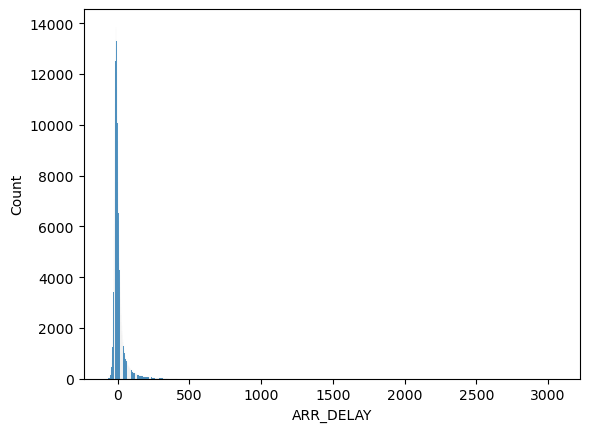

In [14]:
sns.histplot(flight_data_df['ARR_DELAY'], )
rcParams['figure.figsize'] = 11,8
plt.savefig("data/Fig1.png")
plt.show()

In [15]:
print("Skewness: %f" % flight_data_df['ARR_DELAY'].skew())
print("Kurtosis: %f" % flight_data_df['ARR_DELAY'].kurt())

Skewness: 9.855217
Kurtosis: 190.858695


The data reveals a closely grouped distribution, with the peak exhibiting greater height than width. This implies that most delays are brief in duration. Conversely, a minority of delays stand out for their longer durations compared to the predominant short-term delays.

In [16]:
min_value = flight_data_df.ARR_DELAY.min()
min_value

-80.0

In [17]:
max_value = flight_data_df.ARR_DELAY.max()
max_value

3063.0

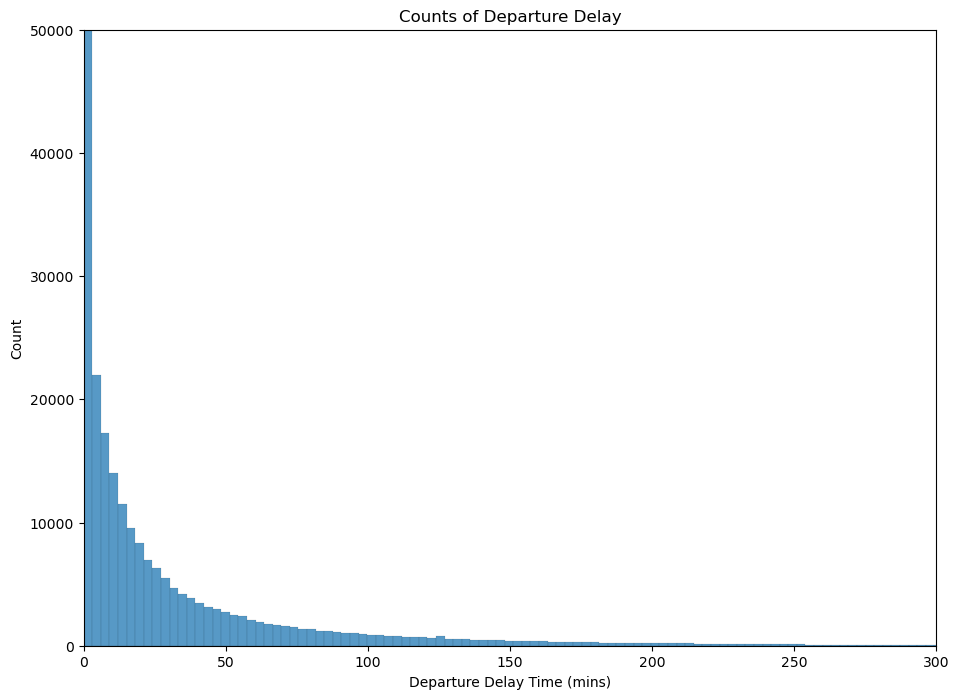

In [18]:
# The distribution of the delay minutes
sns.histplot(data = flight_data_df, x = "DEP_DELAY_NEW", bins = 1000)
plt.xlim(left = 0, right = 300)
plt.ylim(bottom = 0, top = 50000)
plt.title("Counts of Departure Delay")
plt.xlabel("Departure Delay Time (mins)")
plt.savefig("data/Fig2.png")
plt.show()

In [19]:
flight_data_df["DEP_DELAY_NEW"].value_counts()

DEP_DELAY_NEW
0.0       326076
1.0        11573
2.0         9682
3.0         8685
4.0         7894
           ...  
1691.0         1
667.0          1
976.0          1
1199.0         1
682.0          1
Name: count, Length: 1065, dtype: int64

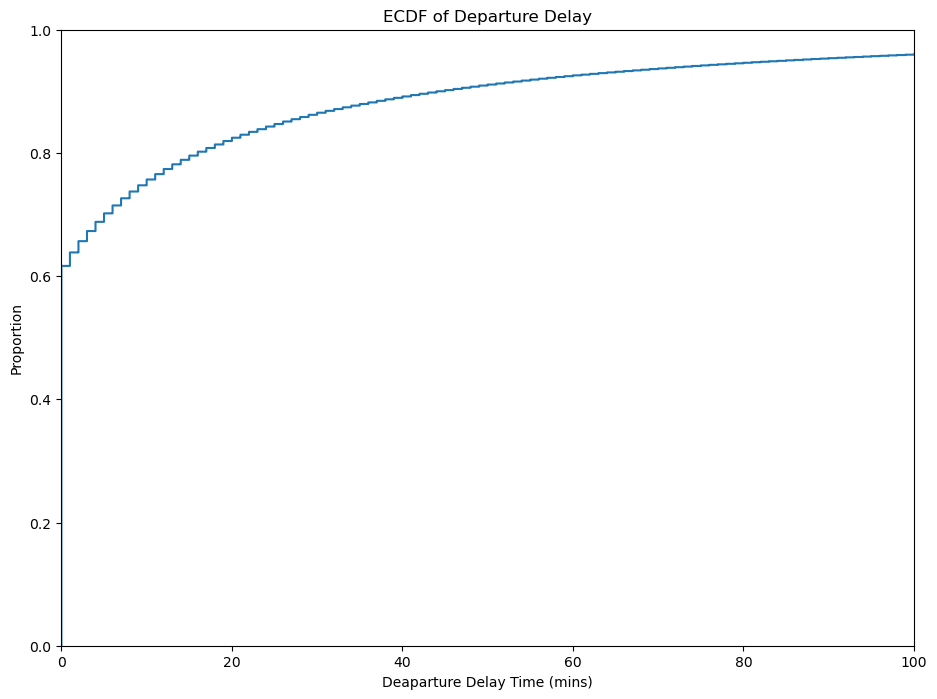

In [20]:
sns.ecdfplot(data = flight_data_df, x = "DEP_DELAY_NEW")
plt.xlim(left = 0, right = 100)
plt.title("ECDF of Departure Delay")
plt.xlabel("Deaparture Delay Time (mins)")
plt.savefig("data/Fig3.png")

In terms of departure delay times, there are 326,076 flights experiencing no delay, and an additional 11,573 flights with just a 1-minute delay. To enhance readability, the histogram's y-limit is set at 360,000, revealing a right-skewed distribution. This skew suggests that the majority of flight delay times are on the lower end.

Analyzing the ECDF plot with an x-limit of 100, we observe that more than 70% of flights experience no delay, and 95% of flights have delays less than 100 minutes. This indicates that our focus should be on addressing issues causing shorter delay times.

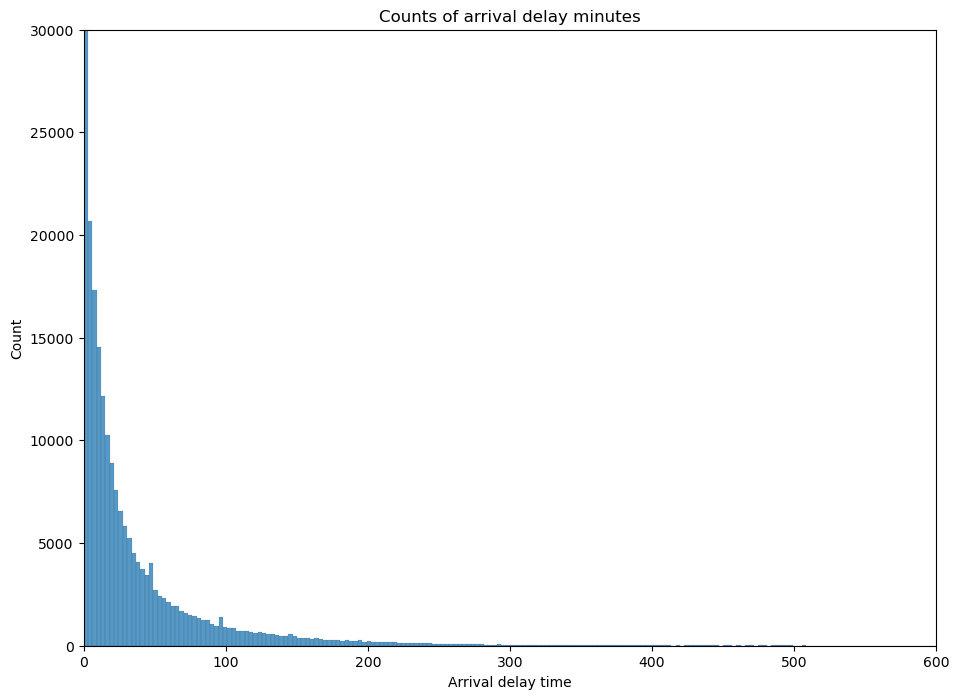

In [21]:
sns.histplot(data = flight_data_df, x = "ARR_DELAY_NEW", bins = 1000)
plt.xlim(left = 0, right = 600)
plt.ylim(bottom = 0, top = 30000)
plt.title("Counts of arrival delay minutes")
plt.xlabel("Arrival delay time")
plt.savefig("data/Fig4.png")
plt.show()

In [22]:
flight_data_df["ARR_DELAY_NEW"].value_counts()

ARR_DELAY_NEW
0.0       324622
1.0         8782
2.0         8377
3.0         7763
4.0         7310
           ...  
666.0          1
625.0          1
1206.0         1
1686.0         1
677.0          1
Name: count, Length: 1062, dtype: int64

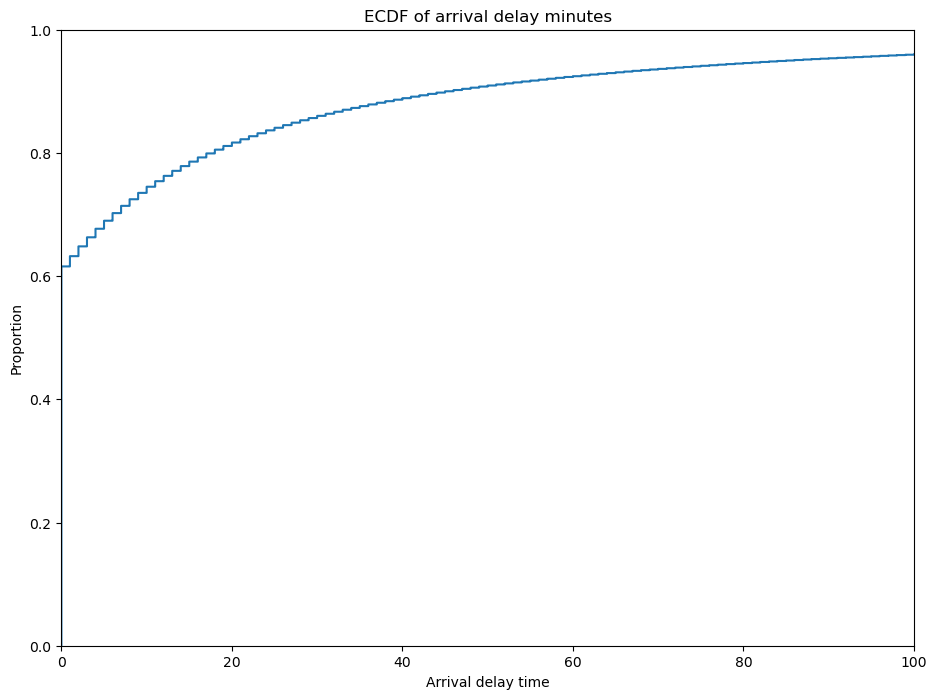

In [23]:
sns.ecdfplot(data = flight_data_df, x = "ARR_DELAY_NEW")
plt.xlim(left = 0, right = 100)
plt.title("ECDF of arrival delay minutes")
plt.xlabel("Arrival delay time")
plt.savefig("data/Fig5.png")

In terms of arrival delay times, there are 324,622 flights experiencing no delay, and the second-highest number of delays, amounting to 15 minutes, is observed in 600 flights. To enhance readability, the histogram's y-limit is set at 30,000, revealing a right-skewed distribution—indicating that the majority of flight delay times are on the lower end.

Examining the ECDF plot with an x-limit of 100, it becomes evident that nearly 80% of flights experience no delay, and there is a notable absence of flights with arrival delay times falling between 1 to 15 minutes.

# Which airport has the most delaied?

### Departure Delay

In [24]:
df_the_most_delaied_city_dp = flight_data_df.groupby("ORIGIN_CITY_NAME")["DEP_DELAY_NEW"]\
.describe().sort_values("mean", ascending = False).head(10)

df_the_most_delaied_city_dp

,count,mean,std,min,25%,50%,75%,max
ORIGIN_CITY_NAME,,,,,,,,
"Riverton/Lander, WY",30.0,69.066667,170.907302,0.0,0.0,0.0,18.50,826.0
"Pellston, MI",49.0,67.714286,225.781052,0.0,0.0,0.0,26.00,1222.0
"North Bend/Coos Bay, OR",17.0,52.000000,75.030827,0.0,3.0,11.0,118.00,218.0
"Prescott, AZ",60.0,47.466667,94.192098,0.0,0.0,0.0,35.25,347.0
"Jackson, WY",501.0,46.361277,135.090900,0.0,0.0,11.0,45.00,1744.0
"Clarksburg/Fairmont, WV",10.0,45.700000,73.347044,0.0,0.0,4.0,59.50,207.0
"Escanaba, MI",58.0,45.327586,150.027177,0.0,0.0,0.0,1.75,944.0
"North Platte, NE",69.0,44.855072,119.806004,0.0,0.0,0.0,16.00,726.0
"Texarkana, AR",87.0,44.620690,169.580141,0.0,0.0,0.0,0.00,1441.0


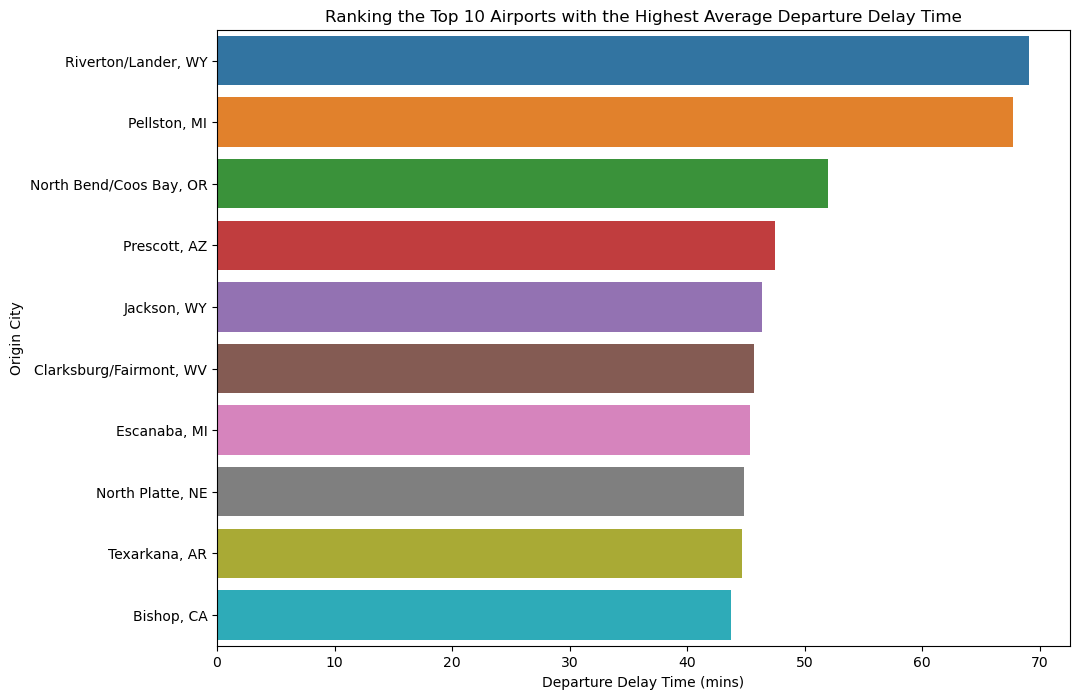

In [25]:
# Plot the average departure delay minutes in each airport
sns.barplot(data = df_the_most_delaied_city_dp, x = "mean",\
            y = df_the_most_delaied_city_dp.index, errorbar = None)
plt.title("Ranking the Top 10 Airports with the Highest Average Departure Delay Time")
plt.ylabel("Origin City")
plt.xlabel("Departure Delay Time (mins)")
plt.savefig("data/Fig6.png")

### Depature delay without outliers

In [26]:
def outlier_stat(serise):
    if isinstance(serise, pd.Series):
        Q1 = serise.quantile(0.25)
        Q3 = serise.quantile(0.75)
        IQR = Q3 - Q1
        higher_bond = Q3 + 1.5 * IQR
        lower_bond = Q1 - 1.5 * IQR
        return Q1, Q3, IQR,lower_bond, higher_bond
    else:
        raise TypeError("The argument passed in is not pandas serise")

In [27]:
Q1, Q3, IQR,lower_bond, higher_bond = outlier_stat(flight_data_df["DEP_DELAY_NEW"])
df_dep_delay_without_outli = flight_data_df[(flight_data_df["DEP_DELAY_NEW"] > lower_bond) & (flight_data_df["DEP_DELAY_NEW"] < higher_bond)]
df_dep_delay_without_outli = df_dep_delay_without_outli.groupby("ORIGIN_CITY_NAME")["DEP_DELAY_NEW"]\
.describe().sort_values("mean", ascending = False).head(10)

df_dep_delay_without_outli

,count,mean,std,min,25%,50%,75%,max
ORIGIN_CITY_NAME,,,,,,,,
"North Bend/Coos Bay, OR",12.0,7.500000,8.185353,0.0,0.0,5.5,11.75,24.0
"Niagara Falls, NY",18.0,6.000000,5.687965,0.0,0.0,6.0,10.50,17.0
"Plattsburgh, NY",28.0,6.000000,7.654580,0.0,0.0,1.5,12.25,21.0
"Cody, WY",2.0,6.000000,8.485281,0.0,3.0,6.0,9.00,12.0
"Pago Pago, TT",6.0,5.166667,7.167054,0.0,0.5,3.0,5.50,19.0
"Jackson, WY",324.0,4.743827,7.038536,0.0,0.0,0.0,9.25,24.0
"Joplin, MO",42.0,4.547619,7.526222,0.0,0.0,0.0,11.50,21.0
"Ashland, WV",19.0,4.421053,6.954741,0.0,0.0,0.0,6.50,22.0
"Denver, CO",16861.0,4.328510,6.481287,0.0,0.0,0.0,7.00,24.0


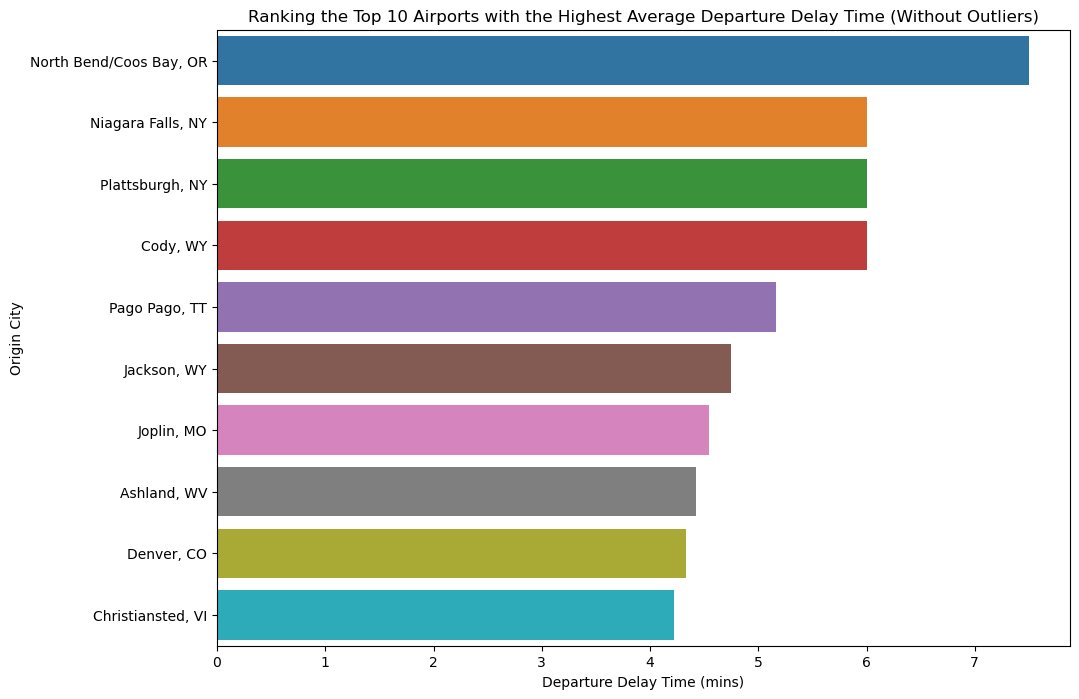

In [28]:
# Plot the average departure delay minutes in each airport without outliers
sns.barplot(data = df_dep_delay_without_outli, x = "mean",\
            y = df_dep_delay_without_outli.index, errorbar = None)
plt.title("Ranking the Top 10 Airports with the Highest Average Departure Delay Time (Without Outliers)")
plt.ylabel("Origin City")
plt.xlabel("Departure Delay Time (mins)")
plt.savefig("data/Fig7.png")

### Arrival Delay

In [29]:
# The airport with the most delay minutes
df_the_most_delaied_city_ar = flight_data_df.groupby("DEST_CITY_NAME")["ARR_DELAY_NEW"]\
.describe().sort_values("mean", ascending = False).head(10)

df_the_most_delaied_city_ar

,count,mean,std,min,25%,50%,75%,max
DEST_CITY_NAME,,,,,,,,
"Grand Forks, ND",116.0,46.672414,188.391534,0.0,0.0,0.0,8.75,1736.0
"Provo, UT",147.0,45.353741,139.662647,0.0,0.0,13.0,33.00,1117.0
"Hancock/Houghton, MI",54.0,38.851852,101.231364,0.0,0.0,5.0,31.00,706.0
"North Platte, NE",69.0,38.492754,106.254083,0.0,0.0,0.0,21.00,744.0
"Punta Gorda, FL",545.0,37.115596,111.017402,0.0,0.0,5.0,34.00,1488.0
"Riverton/Lander, WY",30.0,36.566667,134.791712,0.0,0.0,0.0,13.00,733.0
"Newburgh/Poughkeepsie, NY",53.0,36.283019,101.347342,0.0,0.0,7.0,28.00,706.0
"Aspen, CO",727.0,35.991747,76.879140,0.0,0.0,11.0,40.00,905.0
"North Bend/Coos Bay, OR",17.0,35.705882,57.712395,0.0,0.0,22.0,28.00,213.0


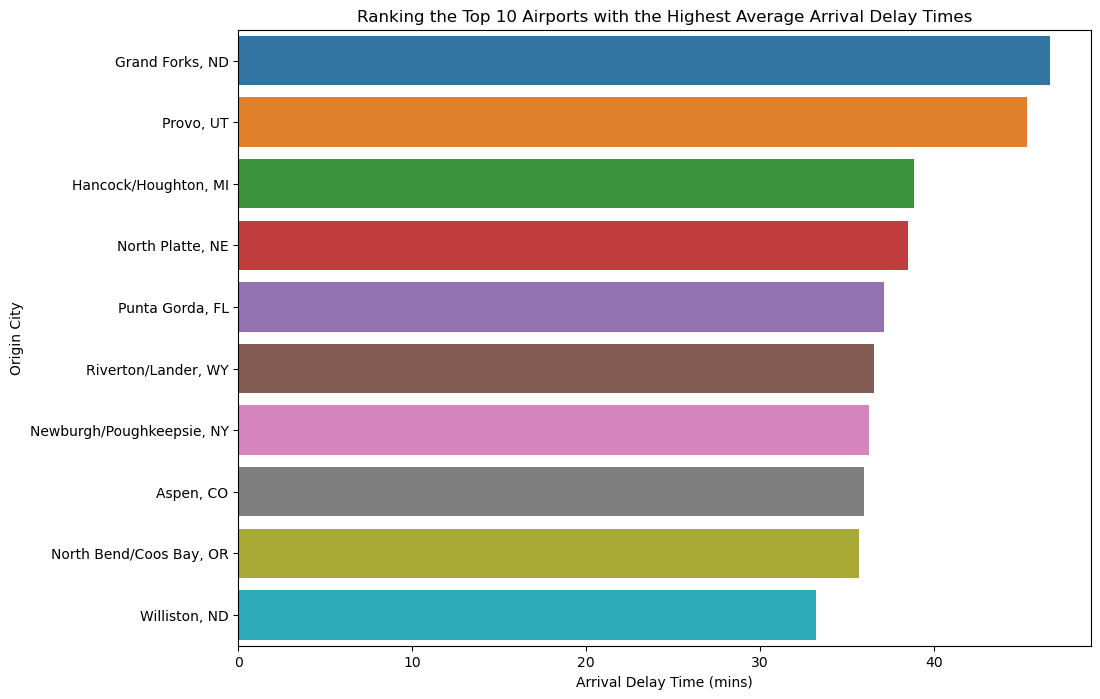

In [30]:
# Plot the average departure delay minutes in each airport
sns.barplot(data = df_the_most_delaied_city_ar, x = "mean",\
            y = df_the_most_delaied_city_ar.index, errorbar = None)
plt.title("Ranking the Top 10 Airports with the Highest Average Arrival Delay Times")
plt.ylabel("Origin City")
plt.xlabel("Arrival Delay Time (mins)")
plt.savefig("data/Fig8.png")

# Which airlines has the most delay?

### Depature Delay

In [31]:
df_airline_dep_delay = flight_data_df.groupby("Airline")["DEP_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_dep_delay

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Frontier Airlines,12859.0,28.950385,77.016125,0.0,0.0,2.0,31.0,1312.0
Allegiant Air,8503.0,22.737622,84.901127,0.0,0.0,0.0,15.0,1778.0
Spirit Airlines,21369.0,21.427161,52.726012,0.0,0.0,0.0,20.0,1452.0
JetBlue Airways,23067.0,21.021069,59.318173,0.0,0.0,0.0,16.0,1586.0
American Airlines,73632.0,18.094022,73.682098,0.0,0.0,0.0,8.0,3024.0
SkyWest Airlines Inc.,48726.0,17.371793,63.820854,0.0,0.0,0.0,6.0,1662.0
United Airlines,56270.0,17.147752,50.596898,0.0,0.0,0.0,11.0,1363.0
Delta Airlines,74615.0,15.991516,56.171022,0.0,0.0,0.0,9.0,1261.0
Endeavor Air Inc.,16689.0,15.727186,54.457764,0.0,0.0,0.0,3.0,1173.0


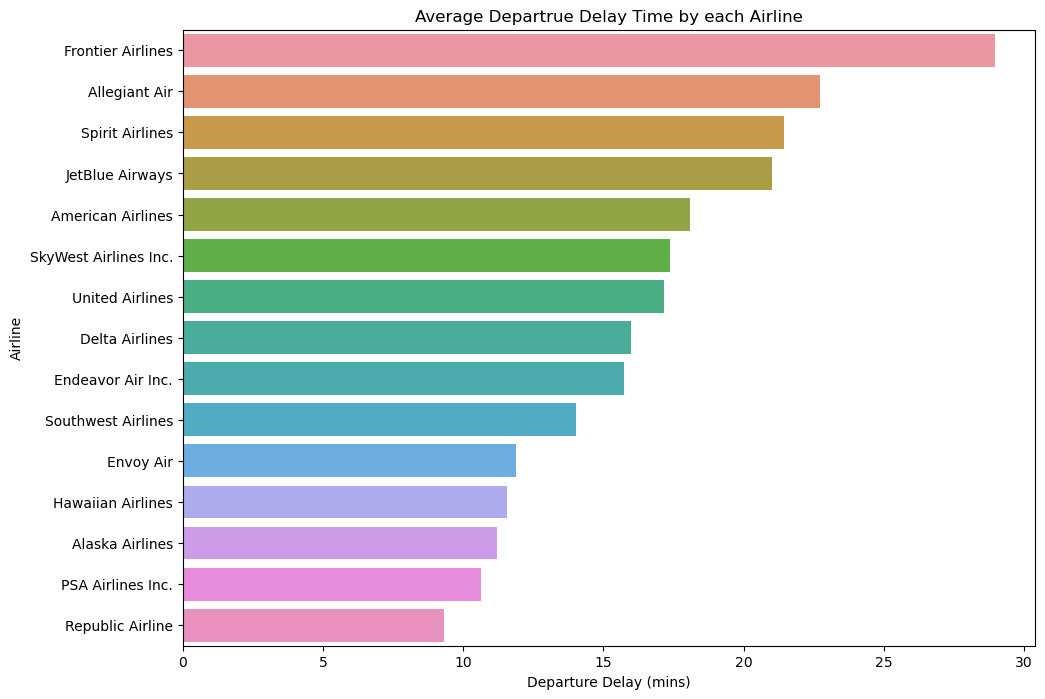

In [32]:
sns.barplot(data = df_airline_dep_delay, x = "mean", y = df_airline_dep_delay.index)
plt.title("Average Departrue Delay Time by each Airline")
plt.xlabel("Departure Delay (mins)")
plt.savefig("data/Fig9.png")

### Arrival Delay

In [33]:
df_airline_arr_delay = flight_data_df.groupby("Airline")["ARR_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_airline_arr_delay

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Frontier Airlines,12828.0,28.153181,75.991039,0.0,0.0,1.0,30.0,1320.0
Allegiant Air,8478.0,24.117834,85.165400,0.0,0.0,0.0,19.0,1755.0
Spirit Airlines,21348.0,21.376850,52.575596,0.0,0.0,0.0,20.0,1434.0
JetBlue Airways,22978.0,21.030812,59.052398,0.0,0.0,0.0,17.0,1716.0
SkyWest Airlines Inc.,48378.0,19.076791,64.023193,0.0,0.0,0.0,12.0,1653.0
American Airlines,73454.0,18.966768,72.481343,0.0,0.0,0.0,12.0,3063.0
Endeavor Air Inc.,16637.0,17.349402,55.317798,0.0,0.0,0.0,10.0,1216.0
United Airlines,56102.0,17.208192,49.927745,0.0,0.0,0.0,12.0,1363.0
Delta Airlines,74419.0,15.827544,55.182495,0.0,0.0,0.0,9.0,1274.0


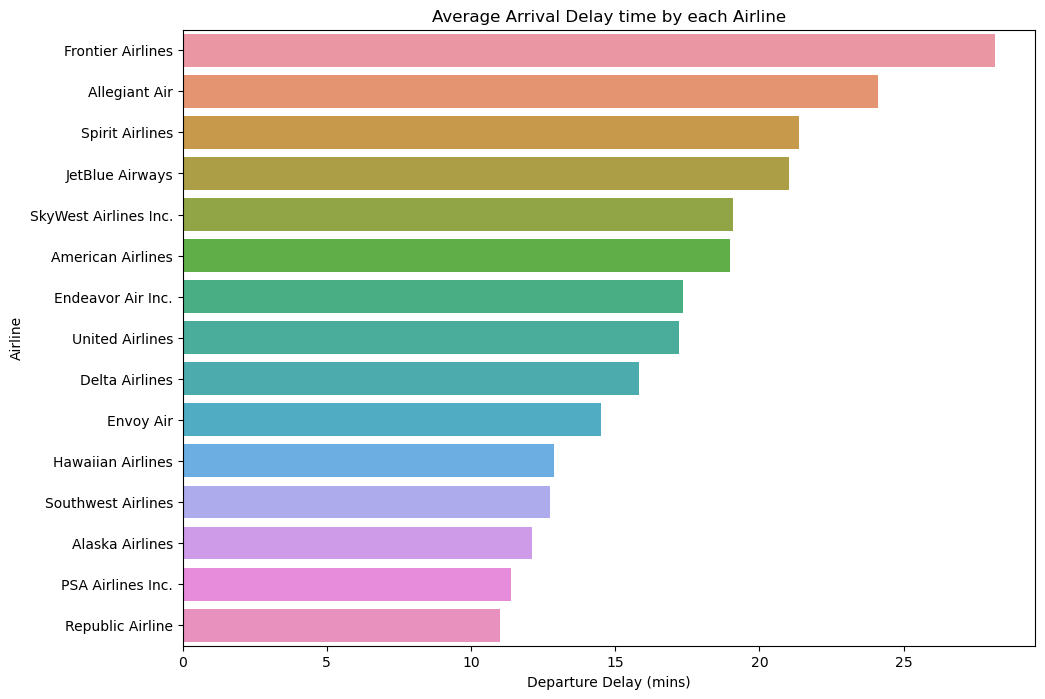

In [34]:
sns.barplot(data = df_airline_arr_delay, x = "mean", y = df_airline_arr_delay.index)
plt.title("Average Arrival Delay time by each Airline")
plt.xlabel("Departure Delay (mins)")
plt.savefig("data/Fig10.png")

In [35]:
flight_data_df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE', 'OP_UNIQUE_CARRIER',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'ORIGIN_STATE_NM', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'FIRST

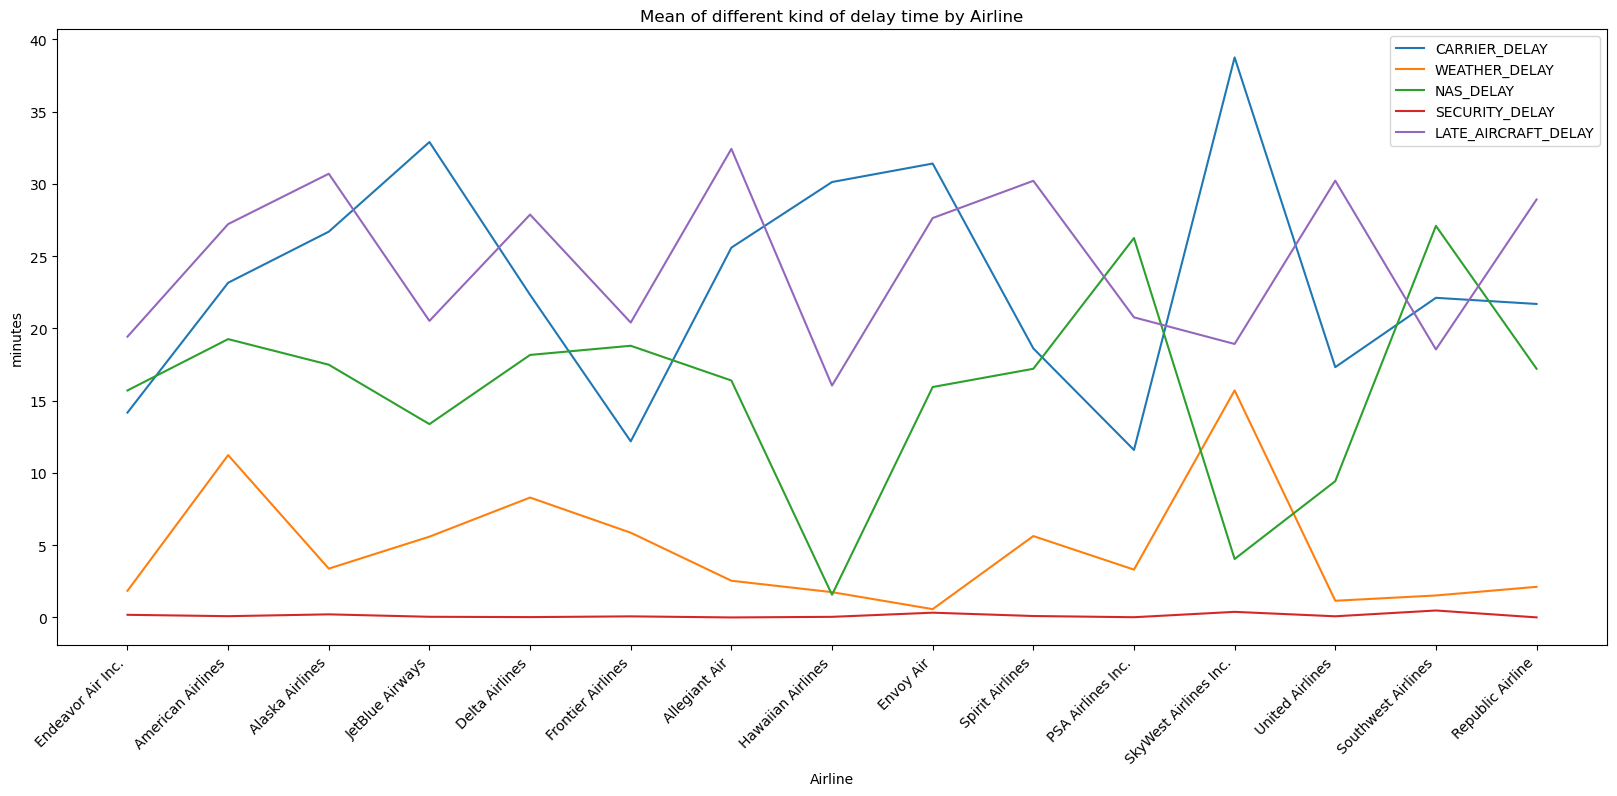

In [36]:
# Mean of each kind of delay groupby airline
fig, ax = plt.subplots(figsize = (20,8)) 
df_airline = flight_data_df[['Airline','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
                 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df_dep_delay_airline = df_airline.groupby("Airline").mean().plot(kind = "line", ax = ax)
ax.set_xticks(range(len(df_airline["Airline"].unique())))
ax.set_xticklabels(df_airline["Airline"].unique(), rotation = 45, ha = "right")
plt.ylabel("minutes")
plt.title("Mean of different kind of delay time by Airline")
plt.savefig("data/Fig11.png")

The weather and securtiy delay of each airline are lower than other kind of delay

# What are the delay on each day of week?

### Arrival Delay

In [37]:
def day_abbreviation_to_name(x): 
    day_of_week = {
        "1": "Monday",
        "2": "Tuesday",
        "3": "Wednesday",
        "4": "Thursday",
        "5": "Friday",
        "6": "Saturday",
        "7": "Sunday",
    }
    return day_of_week.get(str(x), "Unknown")

flight_data_df["day_of_week"] = flight_data_df["DAY_OF_WEEK"].apply(day_abbreviation_to_name)
flight_data_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM,Airline,day_of_week
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,Sunday
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,Sunday
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,Sunday
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,Sunday
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Endeavor Air Inc.,Sunday


In [38]:
df_day_of_week_arr = flight_data_df.groupby("day_of_week")["ARR_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_day_of_week_arr

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Wednesday,65744.0,29.630278,63.943394,0.0,0.0,0.0,31.0,1740.0
Monday,88165.0,18.494334,60.845387,0.0,0.0,0.0,12.0,1877.0
Tuesday,82918.0,15.967474,59.317939,0.0,0.0,0.0,9.0,3063.0
Sunday,85862.0,15.071126,51.758326,0.0,0.0,0.0,11.0,2061.0
Thursday,71654.0,14.754487,49.626881,0.0,0.0,0.0,12.0,2687.0
Friday,72107.0,11.136991,40.098334,0.0,0.0,0.0,7.0,2027.0
Saturday,60747.0,10.036183,41.902519,0.0,0.0,0.0,4.0,2078.0


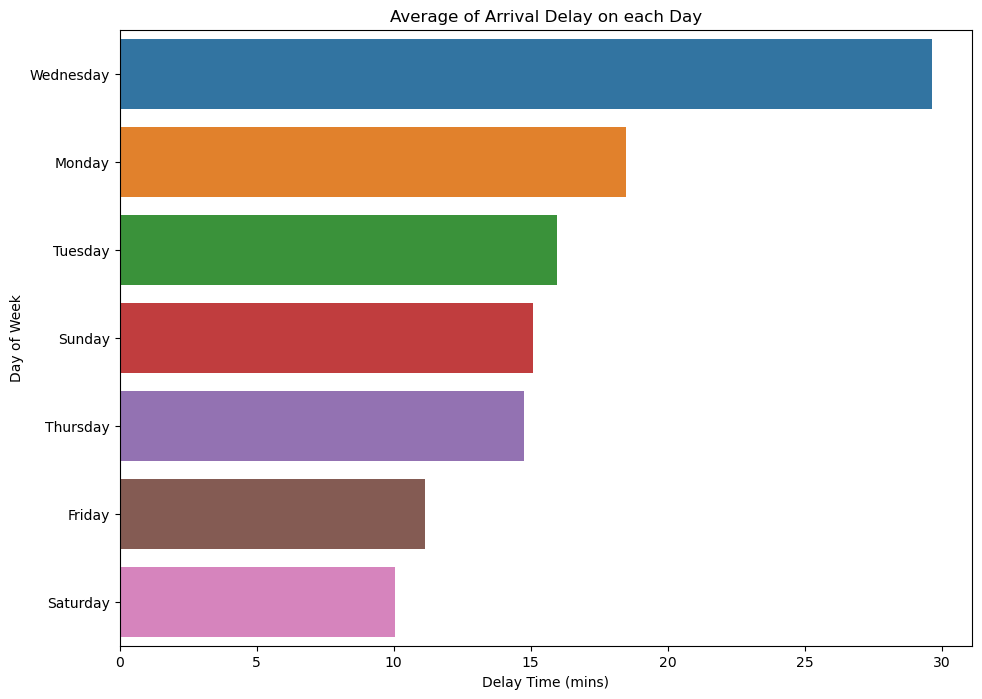

In [39]:
sns.barplot(data = df_day_of_week_arr, x = "mean",\
           y = df_day_of_week_arr.index)
plt.title("Average of Arrival Delay on each Day")
plt.xlabel("Delay Time (mins)")
plt.ylabel("Day of Week")
plt.savefig("data/Fig12.png")

### Departure Delay

In [40]:
df_day_of_week_dep = flight_data_df.groupby("day_of_week")["DEP_DELAY_NEW"].describe()\
.sort_values(by = "mean", ascending = False)

df_day_of_week_arr

,count,mean,std,min,25%,50%,75%,max
day_of_week,,,,,,,,
Wednesday,65744.0,29.630278,63.943394,0.0,0.0,0.0,31.0,1740.0
Monday,88165.0,18.494334,60.845387,0.0,0.0,0.0,12.0,1877.0
Tuesday,82918.0,15.967474,59.317939,0.0,0.0,0.0,9.0,3063.0
Sunday,85862.0,15.071126,51.758326,0.0,0.0,0.0,11.0,2061.0
Thursday,71654.0,14.754487,49.626881,0.0,0.0,0.0,12.0,2687.0
Friday,72107.0,11.136991,40.098334,0.0,0.0,0.0,7.0,2027.0
Saturday,60747.0,10.036183,41.902519,0.0,0.0,0.0,4.0,2078.0


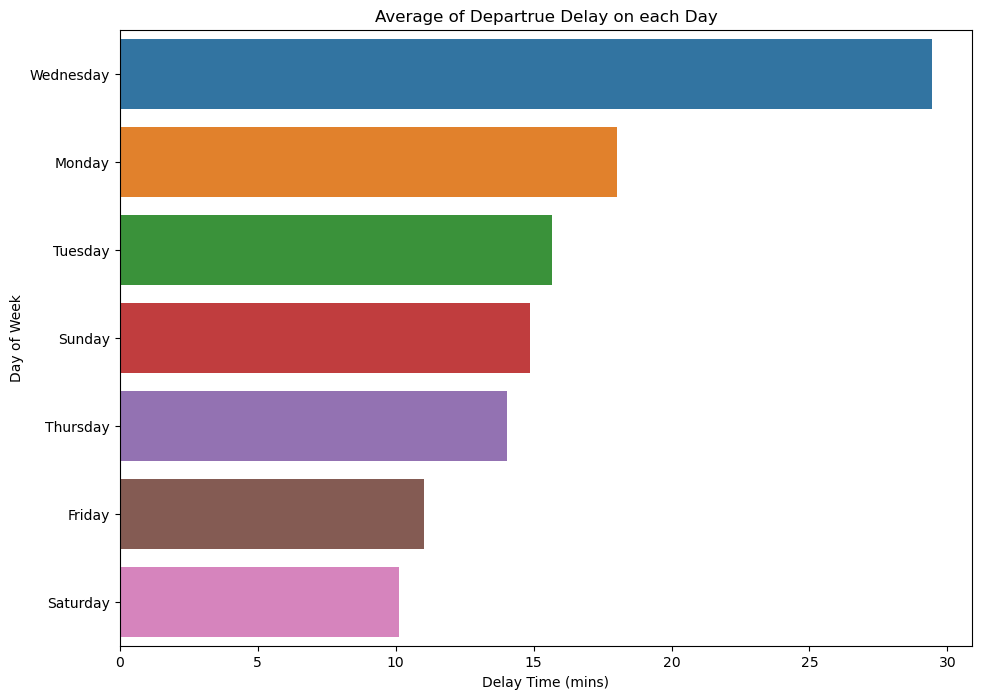

In [41]:
sns.barplot(data = df_day_of_week_dep, x = "mean",\
           y = df_day_of_week_dep.index)
plt.title("Average of Departrue Delay on each Day")
plt.xlabel("Delay Time (mins)")
plt.ylabel("Day of Week")
plt.savefig("data/Fig13.png")

# Delay on each day of month

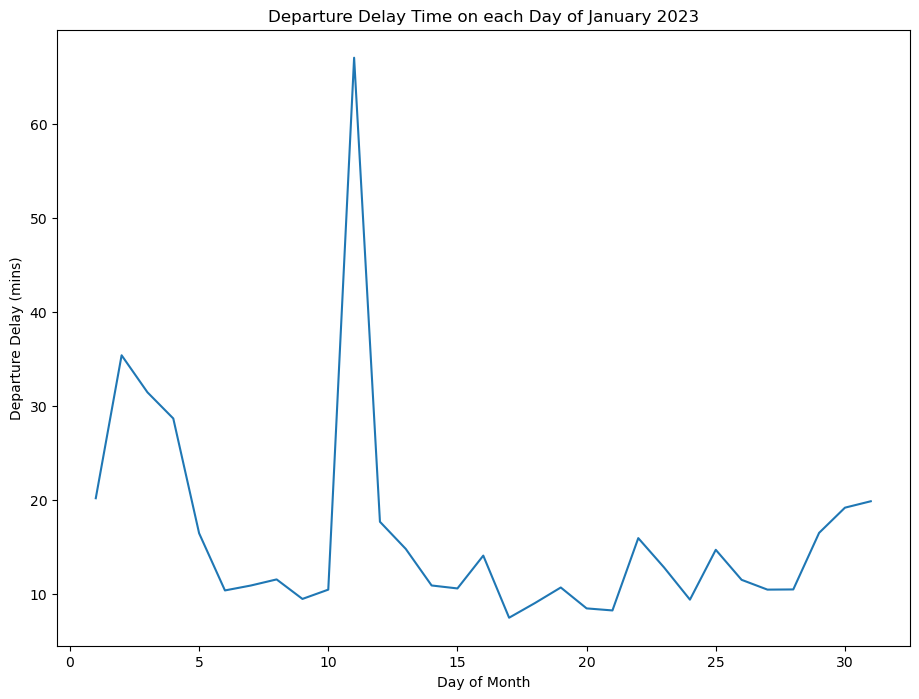

In [42]:
sns.lineplot(data = flight_data_df, x = "DAY_OF_MONTH", y = "DEP_DELAY_NEW", errorbar = None)
plt.title("Departure Delay Time on each Day of January 2023")
plt.ylabel("Departure Delay (mins)")
plt.xlabel("Day of Month")
plt.savefig("data/Fig14.png")

On January 11, 2023, U.S. flights were grounded or delayed as the Federal Aviation Administration (FAA) attempted to fix a system outage. FAA paused all flight departures between 7:30 a.m. and 9 a.m. ET. Flights already in the air were allowed to continue to their destinations. Around 8:30 am.

In [43]:
flight_data_df.groupby("DAY_OF_MONTH")["DEP_DELAY_NEW"].describe()

,count,mean,std,min,25%,50%,75%,max
DAY_OF_MONTH,,,,,,,,
1,15592.0,20.176437,57.622640,0.0,0.0,0.0,18.0,1561.0
2,17295.0,35.377392,83.474753,0.0,0.0,4.0,37.0,1363.0
3,17024.0,31.440789,86.748363,0.0,0.0,5.0,32.0,2554.0
4,16162.0,28.657530,65.912696,0.0,0.0,2.0,30.0,1471.0
5,16816.0,16.453318,54.120832,0.0,0.0,0.0,13.0,1744.0
6,16997.0,10.372772,37.700914,0.0,0.0,0.0,5.0,1309.0
7,15548.0,10.893941,41.042279,0.0,0.0,0.0,6.0,1481.0
8,17704.0,11.544736,43.386156,0.0,0.0,0.0,8.0,1790.0
9,18115.0,9.469169,43.447039,0.0,0.0,0.0,3.0,1691.0


The highest departure delay time happened in 11th of January with 67 minutes.

In [44]:
flight_data_df["dep_period"] = pd.cut( x = flight_data_df["CRS_DEP_TIME"], bins = [0, 600, 1200, 1800, 2359],\
                           labels = ["Midnight", "Morning", "Afternoon", "Night"])

flight_data_df["arr_period"] = pd.cut( x = flight_data_df["CRS_ARR_TIME"], bins = [0, 600, 1200, 1800, 2359],\
                           labels = ["Midnight", "Morning", "Afternoon", "Night"])

## Delay on each time period of a day

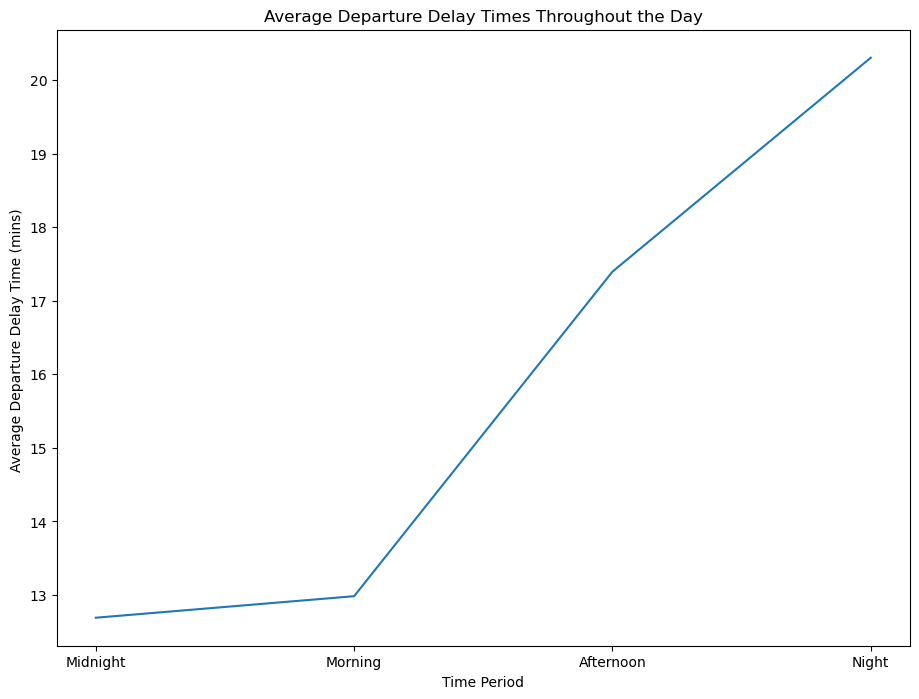

In [45]:
df_dep_delay_period = flight_data_df.groupby("dep_period")['DEP_DELAY_NEW'].describe()
sns.lineplot(data = df_dep_delay_period, x = df_dep_delay_period.index, y = "mean")
plt.title("Average Departure Delay Times Throughout the Day")
plt.ylabel("Average Departure Delay Time (mins) ")
plt.xlabel("Time Period")
plt.savefig("data/Fig15.png")

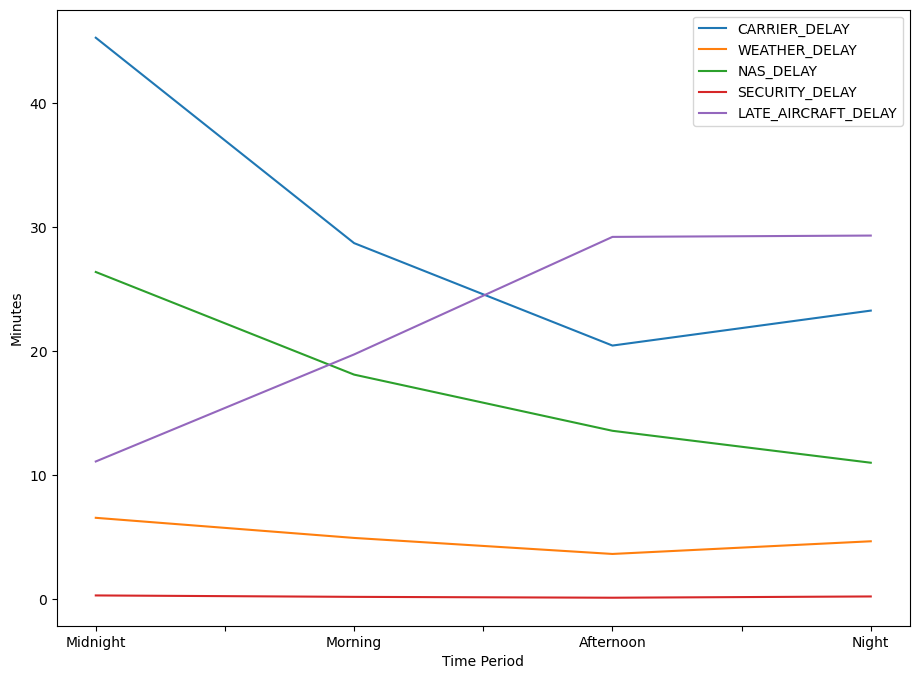

In [46]:
df_delay_kind = flight_data_df[['dep_period', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]
df_delay_kind.groupby("dep_period").mean().plot()
plt.ylabel("Minutes")
plt.xlabel("Time Period")
plt.savefig("data/Fig16.png")

Carrier Delay and Weather Delay shows most delay during the month. Weather Delay is lowest during the month and there was no delay causes by Security Delay. The late aircraft delay is higher in the afternoon and night, while other kinds of delay don't vary too much during each period of a day.

## Scatter Plot

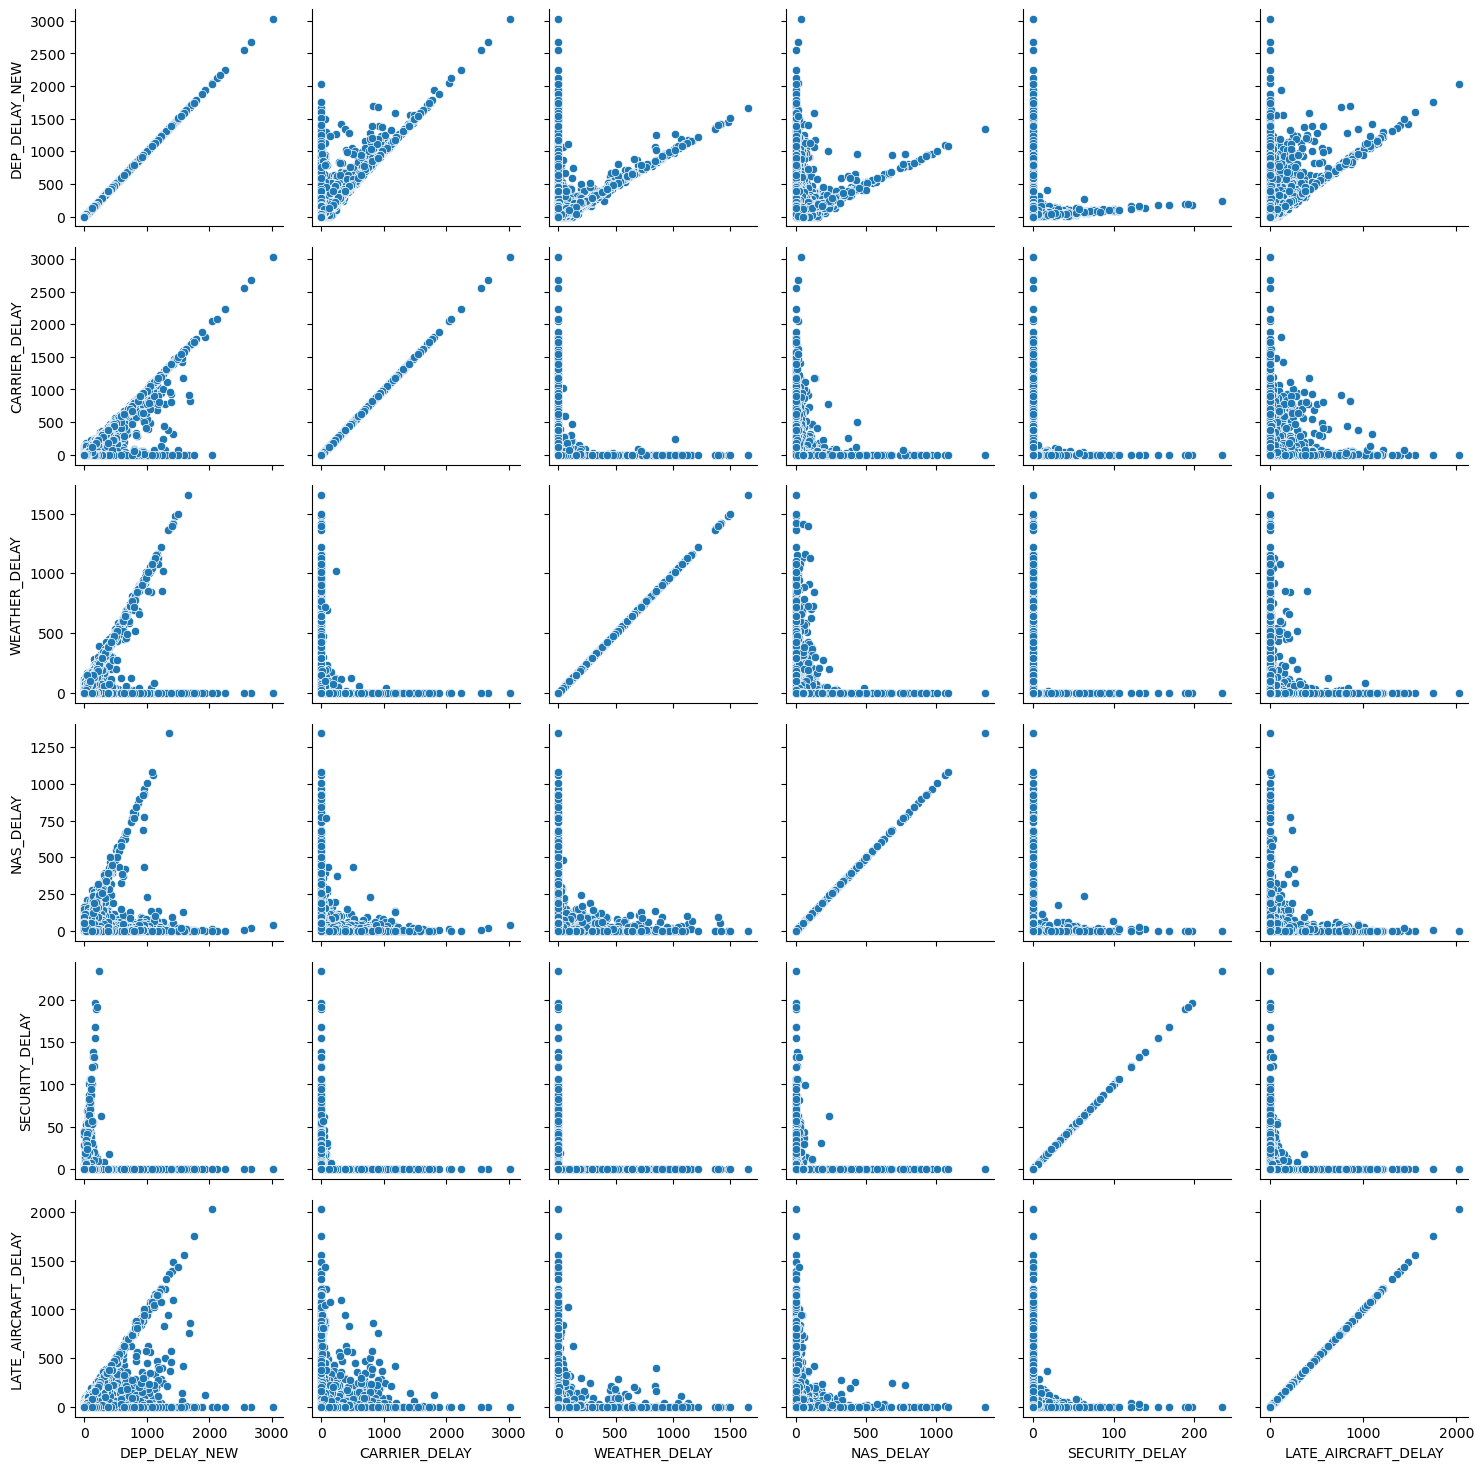

In [48]:
delay_df_pair = flight_data_df[['DEP_DELAY_NEW','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sample(frac = 1)
g = sns.PairGrid(df_pair)
g.map(sns.scatterplot)
plt.savefig("data/Fig17.png")

Departure and arrival delay times show a positive correlation with multiple factors, such as carrier delays, late aircraft delays, weather delays, NAS delays, and security delays. Late aircraft, weather, NAS, and security delays exhibit a tendency to escalate more rapidly than departure and arrival delay times. This indicates that alterations in late aircraft, weather, NAS, and security delays play a disproportionate role in influencing the overall variations in departure and arrival delays.

In [50]:
# Explore the data to understand the unique values in the 'OP_UNIQUE_CARRIER' column
unique_airlines = flight_data_df['OP_UNIQUE_CARRIER'].unique()
print("Unique Airlines:", unique_airlines)

Unique Airlines: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA' 'WN'
 'YX']


In [54]:
# Check unique values in 'OP_UNIQUE_CARRIER'
unique_airlines = flight_data_df['OP_UNIQUE_CARRIER'].unique()
print("Unique Airlines:", unique_airlines)

# Check the number of data points for each airline
for airline_code in unique_airlines:
    dep_delay_data = flight_data_df[flight_data_df['OP_UNIQUE_CARRIER'] == airline_code]['DEP_DELAY']
    num_data_points = dep_delay_data.count()
    print(f"Airline {airline_code}: {num_data_points} data points")

# Perform the hypothesis test
f_statistic, p_value = stats.f_oneway(
    flight_data_df[flight_data_df['OP_UNIQUE_CARRIER'] == 'Airline1']['DEP_DELAY'],
    flight_data_df[flight_data_df['OP_UNIQUE_CARRIER'] == 'Airline2']['DEP_DELAY'],
    flight_data_df[flight_data_df['OP_UNIQUE_CARRIER'] == 'Airline3']['DEP_DELAY'],
    # Add more airlines as needed
)

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Unique Airlines: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA' 'WN'
 'YX']
Airline 9E: 16689 data points
Airline AA: 73632 data points
Airline AS: 19530 data points
Airline B6: 23067 data points
Airline DL: 74615 data points
Airline F9: 12859 data points
Airline G4: 8503 data points
Airline HA: 6628 data points
Airline MQ: 18392 data points
Airline NK: 21369 data points
Airline OH: 15218 data points
Airline OO: 48726 data points
Airline UA: 56270 data points
Airline WN: 109238 data points
Airline YX: 24119 data points
Fail to reject the null hypothesis


C:\Users\Admin\anaconda3\envs\dev\lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [57]:
# Fit the ANOVA model
model = ols('DEP_DELAY ~ OP_UNIQUE_CARRIER', data=flight_data_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [58]:
# Perform Tukey's HSD post-hoc test
tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(flight_data_df['DEP_DELAY'], flight_data_df['OP_UNIQUE_CARRIER'])
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
    9E     AA      nan   nan   nan   nan  False
    9E     AS      nan   nan   nan   nan  False
    9E     B6      nan   nan   nan   nan  False
    9E     DL      nan   nan   nan   nan  False
    9E     F9      nan   nan   nan   nan  False
    9E     G4      nan   nan   nan   nan  False
    9E     HA      nan   nan   nan   nan  False
    9E     MQ      nan   nan   nan   nan  False
    9E     NK      nan   nan   nan   nan  False
    9E     OH      nan   nan   nan   nan  False
    9E     OO      nan   nan   nan   nan  False
    9E     UA      nan   nan   nan   nan  False
    9E     WN      nan   nan   nan   nan  False
    9E     YX      nan   nan   nan   nan  False
    AA     AS      nan   nan   nan   nan  False
    AA     B6      nan   nan   nan   nan  False
    AA     DL      nan   nan   nan   nan  False
    AA     F9      nan   nan   nan  

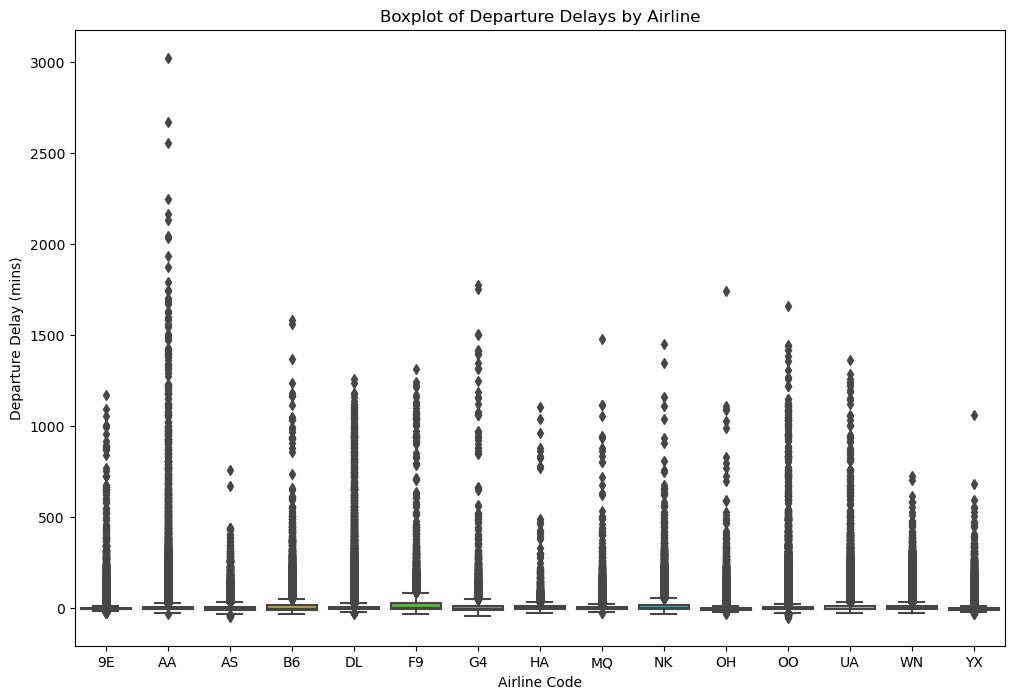

In [63]:
#It appears that the Tukey's HSD post-hoc test did not find any significant differences in mean departure delays between any pair of airlines. The p-values for all group comparisons are "nan," 
#which typically means that the data within those groups might be constant (all values are the same).

#To clarify some things needed will be: Data Inspection, Data Cleaning, Visualization, and Statistical Tests

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=flight_data_df)
plt.title('Boxplot of Departure Delays by Airline')
plt.xlabel('Airline Code')
plt.ylabel('Departure Delay (mins)')
plt.savefig("data/Fig18.png")
plt.show()

The Boxplot shows that AA has more delays this observation aligns with the visual inspection and suggests that there might be practical significance 
even if the statistical test did not find a significant difference.

In [62]:
# Calculate summary statistics for each airline
summary_stats = flight_data_df.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].describe()

# Display summary statistics
print(summary_stats)

                      count       mean        std   min  25%  50%   75%  \
OP_UNIQUE_CARRIER                                                         
9E                  16689.0  12.109174  55.596596 -28.0 -5.0 -4.0   3.0   
AA                  73632.0  14.610332  74.623350 -29.0 -6.0 -3.0   8.0   
AS                  19530.0   6.375320  33.436613 -48.0 -8.0 -3.0   8.0   
B6                  23067.0  16.881086  60.957302 -33.0 -8.0 -2.0  16.0   
DL                  74615.0  13.355143  57.014040 -29.0 -4.0 -1.0   9.0   
F9                  12859.0  26.052259  78.204955 -32.0 -6.0  2.0  31.0   
G4                   8503.0  17.502411  86.509430 -40.0 -9.0 -3.0  15.0   
HA                   6628.0   8.987779  43.855305 -27.0 -5.0  0.0  10.0   
MQ                  18392.0   8.646694  42.306673 -24.0 -5.0 -2.0   6.0   
NK                  21369.0  18.594974  53.992315 -31.0 -5.0 -1.0  20.0   
OH                  15218.0   4.904915  46.665869 -32.0 -9.0 -6.0  -1.0   
OO                  48726

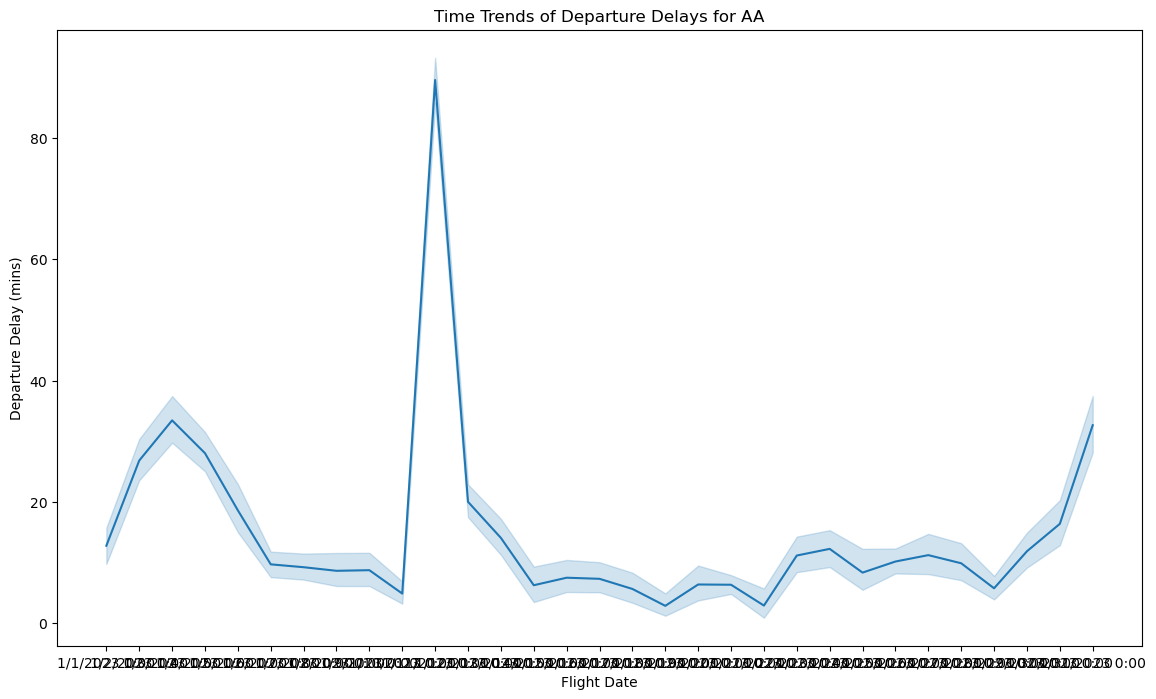

In [68]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='FL_DATE', y='DEP_DELAY', data=flight_data_df[flight_data_df['OP_UNIQUE_CARRIER'] == 'AA'])
plt.title('Time Trends of Departure Delays for AA')
plt.xlabel('Flight Date')
plt.ylabel('Departure Delay (mins)')
plt.savefig("data/Fig18.png")
plt.show()

In [67]:
# Display unique values in the 'DEP_DELAY' column for airline 'AA'
print(flight_data_df[flight_data_df['OP_UNIQUE_CARRIER'] == 'AA']['DEP_DELAY'].unique())

[-2.000e+00 -9.000e+00 -6.000e+00 -1.000e+01 -7.000e+00  6.000e+00
  1.640e+02 -4.000e+00  4.000e+00  1.500e+01  7.000e+00 -3.000e+00
  2.000e+00 -1.000e+00  1.200e+01 -8.000e+00  1.900e+01 -5.000e+00
  1.300e+01  8.000e+00  1.000e+01  1.660e+02 -1.200e+01  4.100e+01
  3.600e+01  6.500e+01 -1.100e+01  3.000e+00  5.000e+00  0.000e+00
  1.430e+02  4.000e+01  6.800e+01  1.000e+00  3.300e+01  2.000e+01
  4.300e+01  6.400e+01  4.500e+01  9.000e+00  4.400e+01  5.900e+01
  1.400e+01  2.100e+01  1.100e+01        nan  2.800e+01  3.200e+01
  3.400e+01  2.600e+01 -1.400e+01  1.010e+02  3.500e+01  5.600e+01
  1.360e+02  4.200e+01  2.200e+01  1.420e+02  5.000e+01  1.600e+01
  1.080e+02  6.900e+01  6.100e+01  2.290e+02  1.110e+02  5.100e+01
  5.840e+02  7.000e+01  1.800e+01  7.890e+02  1.840e+02  1.700e+01
  3.900e+01  4.900e+01 -1.600e+01  8.300e+01  2.900e+01  2.500e+01
  1.200e+02  9.100e+01  2.700e+01  5.800e+01  1.390e+02  1.520e+02
  1.510e+02  7.900e+01  5.200e+01  2.400e+01  7.400e+01  6.200